In [ ]:
import os
import cv2
from tqdm import tqdm
from glob import glob
from albumentations import CenterCrop, RandomRotate90, GridDistortion, HorizontalFlip, VerticalFlip
import matplotlib.pyplot as plt


In [ ]:
def load_data(path):
    images = sorted(glob(os.path.join(path, "images/*")))
    masks = sorted(glob(os.path.join(path, "masks/*")))
    return images, masks

In [ ]:
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [ ]:
def augment_data(images, masks, save_path, augment=True):
    H = 900
    W = 900

    for x, y in tqdm(zip(images, masks), total=len(images)):
        name = x.split("/")[-1].split(".")
        """ Extracting the name and extension of the image and the mask. """
        image_name = name[0]
        image_extn = name[1]

        name = y.split("/")[-1].split(".")
        mask_name = name[0]
        mask_extn = name[1]

        """ Reading image and mask. """
        x = cv2.imread(x, cv2.IMREAD_COLOR)
        y = cv2.imread(y, cv2.IMREAD_COLOR)

        """ Augmentation """
        if augment == True:
            aug = CenterCrop(H, W, p=1.0)
            augmented = aug(image=x, mask=y)
            x1 = augmented["image"]
            y1 = augmented["mask"]

            aug = RandomRotate90(p=1.0)
            augmented = aug(image=x, mask=y)
            x2 = augmented['image']
            y2 = augmented['mask']

            aug = GridDistortion(p=1.0)
            augmented = aug(image=x, mask=y)
            x3 = augmented['image']
            y3 = augmented['mask']

            aug = HorizontalFlip(p=1.0)
            augmented = aug(image=x, mask=y)
            x4 = augmented['image']
            y4 = augmented['mask']

            aug = VerticalFlip(p=1.0)
            augmented = aug(image=x, mask=y)
            x5 = augmented['image']
            y5 = augmented['mask']

            save_images = [x, x1, x2, x3, x4, x5]
            save_masks =  [y, y1, y2, y3, y4, y5]

        else:
            save_images = [x]
            save_masks = [y]

        """ Saving the image and mask. """
        idx = 0
        for i, m in zip(save_images, save_masks):
            i = cv2.resize(i, (W, H))
            m = cv2.resize(m, (W, H))

            if len(images) == 1:
                tmp_img_name = f"{image_name}.{image_extn}"
                tmp_mask_name = f"{mask_name}.{mask_extn}"
            else:
                tmp_img_name = f"{image_name}_{idx}.{image_extn}"
                tmp_mask_name = f"{mask_name}_{idx}.{mask_extn}"

            image_path = os.path.join(save_path, "images", tmp_img_name)
            mask_path = os.path.join(save_path, "masks", tmp_mask_name)

            cv2.imwrite(image_path, i)
            cv2.imwrite(mask_path, m)

            idx += 1

In [ ]:
if __name__ == "__main__":
    """ Loading original images and masks. """
    path = "/content/drive/MyDrive/segmentación_etq03"
    images, masks = load_data(path)
    print(f"Original Images: {len(images)} - Original Masks: {len(masks)}")

    """ Creating folders. """
    create_dir("/content/drive/MyDrive/segmentación_etq03/new_data/images")
    create_dir("/content/drive/MyDrive/segmentación_etq03/new_data/masks")

    """ Applying data augmentation. """
    augment_data(images, masks, "/content/drive/MyDrive/segmentación_etq03/new_data", augment=True)

    """ Loading augmented images and masks. """
    images, masks = load_data("/content/drive/MyDrive/segmentación_etq03/new_data")
    print(f"Augmented Images: {len(images)} - Augmented Masks: {len(masks)}")

Original Images: 11 - Original Masks: 11


100%|██████████| 11/11 [00:12<00:00,  1.17s/it]

Augmented Images: 66 - Augmented Masks: 66


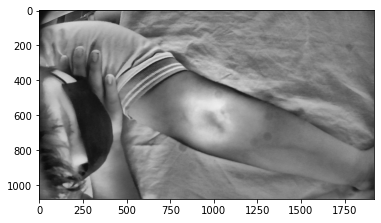

In [ ]:
arr = cv2.imread('/content/drive/MyDrive/segmentación_etq03/images/muestra1.jpg')
ver = cv2.cvtColor(arr, cv2.COLOR_BGR2RGB)
plt.imshow(ver)

In [ ]:
arr.shape

(1080, 1920, 3)